In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

## also use whampy ##

In [2]:
%matplotlib inline
import ch_util
from ch_util import ephemeris as eph
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import h5py
import os
import numpy as np
from spectral_cube import SpectralCube
from matplotlib.ticker import MultipleLocator
from scipy.stats import linregress
from matplotlib.colors import LogNorm
import astropy.io.fits as fits
from reproject import reproject_from_healpix
from reproject import reproject_to_healpix
from astropy_healpix import HEALPix
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
from astropy import units as units
import matplotlib.cm as cm
import sys
from importlib import reload
import copy
import healpy
from astropy import units as u
from astropy.wcs import WCS
from reproject import reproject_interp
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

In [3]:
hdu_Halpha = fits.open('/srv/data/wham/wham-ss-DR1-v161116-170912-grid.fits')
hdr_Halpha = hdu_Halpha[0].header
Halpha_map = hdu_Halpha[0].data
wcs_Halpha = WCS(hdr_Halpha)

 [astropy.io.fits.verify]


In [4]:
xpix_gal, ypix_gal = wcs_Halpha.celestial.wcs_world2pix(137.45706817862768,7.06094581066827, 1)
xpix_gal = np.fix(xpix_gal)
ypix_gal = np.fix(ypix_gal)
xpix_gal, ypix_gal

(170.0, 388.0)

In [5]:
# eq = Equitorial Co-ordinates 
hdu_chimeStokesQ_eq = fits.open('/srv/data/chime/chime_FD_Oct2022/Q_600_800_Nov252022_fix_gal.fits')
hdu_chimeStokesU_eq = fits.open('/srv/data/chime/chime_FD_Oct2022/U_600_800_Nov252022_fix_gal.fits')
header_chime_eq = hdu_chimeStokesU_eq[0].header
wcs_chime_eq = WCS(header_chime_eq)
chimeStokesQ_eq = hdu_chimeStokesQ_eq[0].data
chimeStokesU_eq = hdu_chimeStokesU_eq[0].data
print(chimeStokesQ_eq.shape)

countour_pol_angle= 0.5*np.arctan2(chimeStokesU_eq[475] , chimeStokesQ_eq[475] )# calculating polarization angle

countour_pol_angle[400:] = np.nan
countour_pol_angle[:380] = np.nan
countour_pol_angle[:, 210:] = np.nan

countour_pol_angle[:384,203:] = np.nan

countour_pol_angle[389:,205:] = np.nan

countour_pol_angle[385:392, 167:175] = np.nan


countour_pol_angled, footprint = reproject_interp((countour_pol_angle,wcs_chime_eq.celestial), wcs_Halpha.celestial, (1440, 720))

(512, 720, 1440)


In [8]:
xhead_chime,         yhead_chime = wcs_Halpha.celestial.wcs_world2pix(137.1,7.1, 1)
xhead_chime = int(xhead_chime)
yhead_chime = int(yhead_chime)


xtail_chime,         ytail_chime = wcs_Halpha.celestial.wcs_world2pix(134,6.6, 1)
xtail_chime = int(xtail_chime)
ytail_chime = int(ytail_chime)

xoff_chime,         yoff_chime =  wcs_Halpha.celestial.wcs_world2pix(135,9.5, 1)
xoff_chime = int(xoff_chime)
yoff_chime = int(yoff_chime)


In [9]:


countour_pol_angle= 0.5*np.arctan2(chimeStokesU_eq[475] , chimeStokesQ_eq[475] )# calculating polarization angle

countour_pol_angle[400:] = np.nan
countour_pol_angle[:380] = np.nan
countour_pol_angle[:, 210:] = np.nan

countour_pol_angle[:384,203:] = np.nan

countour_pol_angle[390:,205:] = np.nan

countour_pol_angle[387:392, 168:176] = np.nan

countour_pol_angled, footprint = reproject_interp((countour_pol_angle,wcs_chime_eq.celestial), wcs_Halpha.celestial, (1440, 720))

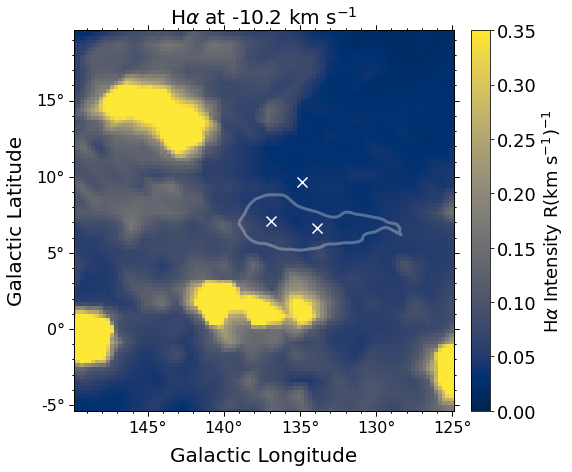

In [10]:
xpix_gal, ypix_gal = wcs_Halpha.celestial.wcs_world2pix(137.45706817862768,7.06094581066827, 1)
xpix_gal = np.fix(xpix_gal)
ypix_gal = np.fix(ypix_gal)
xpix_gal, ypix_gal

s=50
ymin=ypix_gal-s; ymax=ypix_gal+s; xmin=xpix_gal-s; xmax=xpix_gal+s;



fig, ax = plt.subplots(figsize=(15,7), subplot_kw={'projection': wcs_Halpha.celestial, 'slices': ('x', 'y')})
im=ax.imshow(Halpha_map[79], vmin=0, vmax=0.35, cmap='cividis')


levels2=[-np.pi/8]
ax.contour(countour_pol_angled, cmap='Greens', alpha=0.3, levels=levels2, linewidths=3, zorder=20)

ax.set_title(r'H$\alpha$ at -10.2 km s$^{-1}$', fontsize=20)
ax.set_ylabel('Galactic Latitude', fontsize=20)
ax.set_xlabel('Galactic Longitude', fontsize=20)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(1)



ax.scatter(xhead_chime, yhead_chime, c='white', s=100, marker='x', zorder=10)
ax.scatter(xtail_chime, ytail_chime, c='white', s=100, marker='x', zorder=10)
ax.scatter(xoff_chime, yoff_chime,   c='white', s=100, marker='x', zorder=10)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'H$\alpha$ Intensity R(km s$^{-1}$)$^{-1}$', fontsize=18)
#ax.grid(linestyle='dashed')

#plt.savefig('/home/nmohamme/Fall2023/Paper_update/figures/halpha.png', bbox_inches='tight', pad_inches=0.1)